# AirBNB Seattle dataset

In [1]:
# Importing needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## ListingsDataAnalyzing

Have an overview of the data set that describes the whole different appartments that are offered at Seattle airBNB.

In [2]:
df_listing = pd.read_csv('./data/listings.csv')
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
df_listing.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [4]:
df_listing.shape

(3818, 92)

## ReviewsDataAnalyzing

Have an overview of the data set which describes the different reviews.

In [5]:
df_reviews = pd.read_csv('./data/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
df_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [7]:
df_reviews.shape

(84849, 6)

## CalendarDataAnalyzing

Have an overview of the data set that describes the different bookings for an appartment. Firstly, see the when is the posibility to know when seattle is most attractive for tourist.

In [8]:
df_calendar = pd.read_csv('./data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [10]:
df_calendar.shape

(1393570, 4)

In [12]:
df_calendar.shape[0]/365

3818.0

## DataPreparationStage

 
Firstly, the data preparation stage is in the code blocks below. However, I decided to move the data preparation stages to be in a python script. The first block of code below needs to be executed.

### Question 1 : Price Analysis

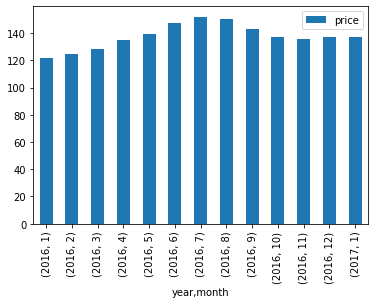

In [11]:

# Use Plot to plot the average price by month  
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
# convert the values to float and removing the $ sign to count the avrg
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar");

#### as shown on the plot above. the peak time is between June & August. It also shows that January has the lowest average price

# Question 2 : How does the pricing increase or decrease by neighborhood?

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

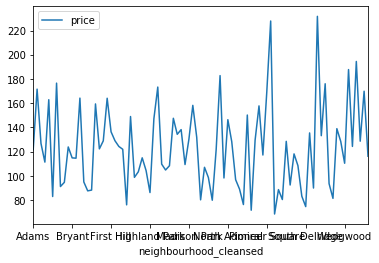

In [13]:
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)
print(df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

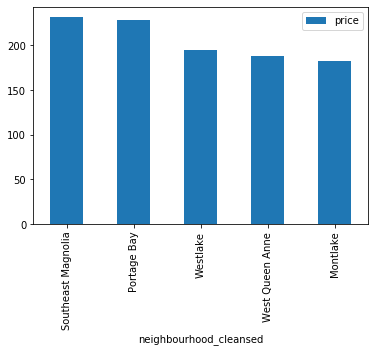

In [15]:
# plot top 10 neighborhoods avrg prices
top10_neigh = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

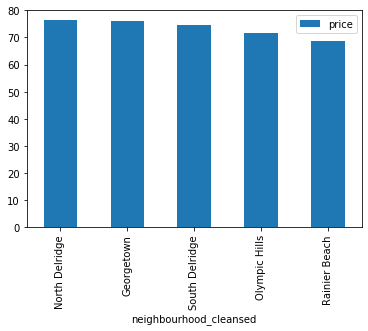

In [17]:
# plot bottom 10 neighborhoods avrg prices
bottom10_neigh = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar');

#### Based on the above analysis, there is a price diffrences based on neighborhoods. The Southeast Magnolia neighborhood looks like the most expensive of all, with the averaging of 231 USD. Followed by Portage Bay at 227 USD, and the cheapest is Rainier Beach at 68 USD in average.

In [19]:
# Property type exploring(with the focus of top 5 expensive):
values_keep_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
values_keep_prop = ('Apartment','House')
df_listing_pruned1 = df_listing.loc[df_listing['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_listing_pruned2 = df_listing_pruned1.loc[df_listing['property_type'].isin(values_keep_prop)]
df_neigh_prop = df_listing_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop


,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [20]:
price_arr = df_neigh_prop['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

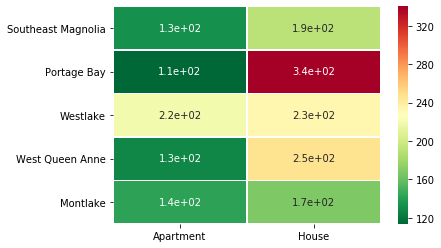

In [21]:
# Heatmap reference: https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
idx = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols = ['Apartment', 'House']
df = pd.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True);

### As shown above, the most expensive is Portage Bay. Then come the houses in West Queen Anne, and Westlake comes directly after it. Overall, property of type house is more expensive than apartment but it is noticed that only in Westlake Apartments & houses has a very close price.